In [1]:
using Random, Zygote, PyPlot, LinearAlgebra, Statistics


In [2]:
using HSVGP

┌ Info: Precompiling HSVGP [d11b312e-8311-4295-b779-e3d9d197688a]
└ @ Base loading.jl:1278


In [3]:
rng = MersenneTwister(123);
N   = 50000
X   = 2 .* rand(rng, N)
X   = reshape(X,(N,1)); # Ensure X has two dimensions as required

Y   = 3*exp.(-0.5 .* X[:,1]) .* sin.(6*X[:,1]) + 0.1 .* randn(rng, N);# .+ 10.;


In [4]:
temp_model = HSVGP.SVGP_obj(X,Y,5);

In [5]:
test_inf   = HSVGP.Inference_obj(X,Y,5);

In [6]:
inds   = rand(1:N, 12);

In [19]:
@time opt_trace, p_traces = HSVGP.fit_svgp!(temp_model, n_iters=20000, batch_size=20, return_param_traces = true);

 31.580530 seconds (81.06 M allocations: 19.630 GiB, 10.18% gc time)


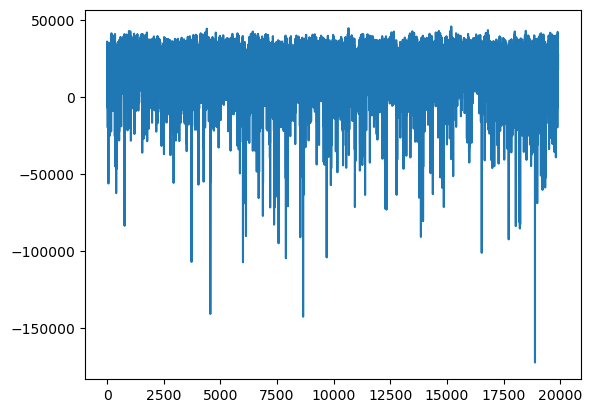

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbc355b7d90>

In [20]:
PyPlot.plot(opt_trace[100:end])

In [21]:
@time opt_trace_inf = HSVGP.fit_inference!(test_inf, n_iters=20000, batch_size=20);

 29.862827 seconds (82.54 M allocations: 19.694 GiB, 10.97% gc time)


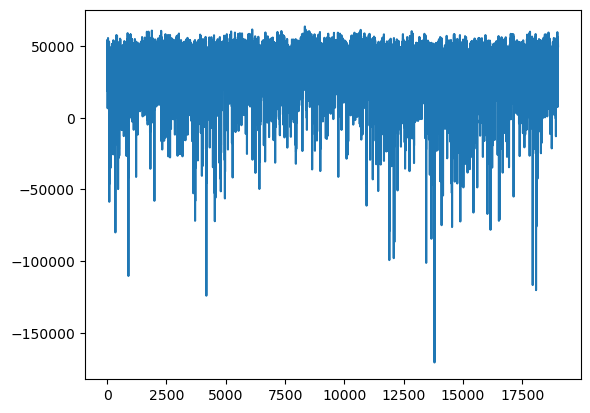

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbc35ed1c70>

In [22]:
PyPlot.plot(opt_trace_inf[1000:end])

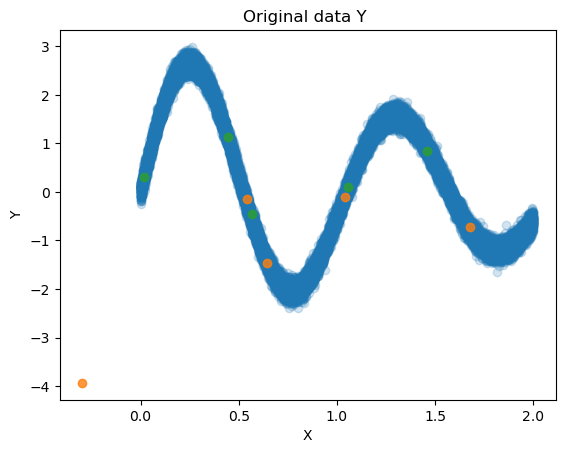

PyObject Text(0.5, 1.0, 'Original data Y ')

In [23]:
PyPlot.scatter(X, Y, alpha=0.2)
PyPlot.scatter(temp_model.params.inducing_locs, temp_model.params.inducing_mean, alpha=0.8)
PyPlot.scatter(test_inf.params[1].inducing_locs, test_inf.params[1].inducing_mean, alpha=0.8)
PyPlot.xlabel("X")
PyPlot.ylabel("Y")
PyPlot.title("Original data Y ")



In [24]:
pX = reshape([-0.:0.05:2.;],(41,1));

In [25]:
predY, predSD = HSVGP.pred_vgp(pX, temp_model.params);
predY_inf, predSD_inf = HSVGP.pred_vgp(pX, test_inf.params[1]);
err_sigma = exp(temp_model.params.log_sigma[1]);
err_sigma_inf = exp(test_inf.params[1].log_sigma[1]);

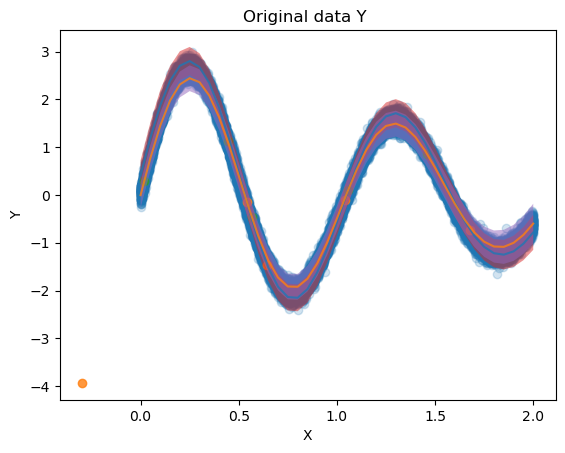

PyObject Text(0.5, 1.0, 'Original data Y ')

In [26]:
PyPlot.scatter(X, Y, alpha=0.2)
PyPlot.scatter(temp_model.params.inducing_locs, temp_model.params.inducing_mean, alpha=0.8)
PyPlot.scatter(test_inf.params[1].inducing_locs, test_inf.params[1].inducing_mean, alpha=0.8)
PyPlot.plot(pX, predY, alpha=0.8)
PyPlot.fill_between(pX[:,1], predY + 2. .* sqrt.(predSD.^2 .+ err_sigma^2), predY - 2. .* sqrt.(predSD.^2 .+ err_sigma^2),alpha=.5)
PyPlot.plot(pX, predY_inf, alpha=0.8)
PyPlot.fill_between(pX[:,1], predY_inf + 2. .* sqrt.(predSD_inf.^2 .+ err_sigma_inf^2), predY_inf - 2. .* sqrt.(predSD_inf.^2 .+ err_sigma_inf^2),alpha=.5)
PyPlot.xlabel("X")
PyPlot.ylabel("Y")
PyPlot.title("Original data Y ")


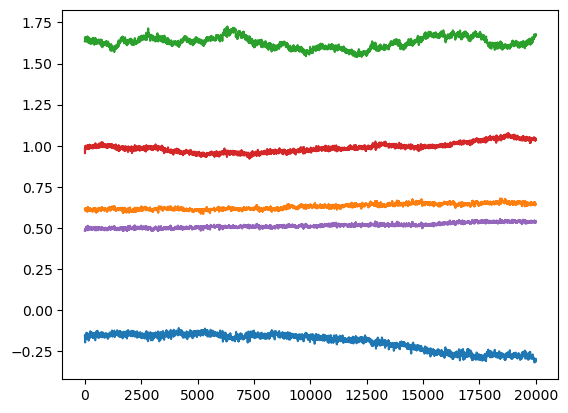

5-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbc3b9f97f0>
 PyObject <matplotlib.lines.Line2D object at 0x7fbc3b9f98e0>
 PyObject <matplotlib.lines.Line2D object at 0x7fbc3b9f99a0>
 PyObject <matplotlib.lines.Line2D object at 0x7fbc3b9f9a60>
 PyObject <matplotlib.lines.Line2D object at 0x7fbc3b9f9b20>

In [27]:
PyPlot.plot(p_traces["inducing_locs"][:,:,1])


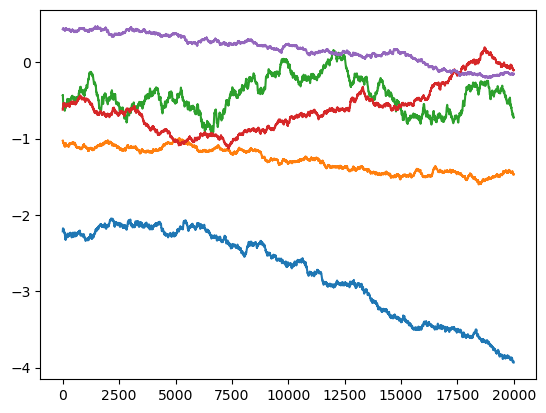

5-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbc3bda4d00>
 PyObject <matplotlib.lines.Line2D object at 0x7fbc3bda4df0>
 PyObject <matplotlib.lines.Line2D object at 0x7fbc3bda4eb0>
 PyObject <matplotlib.lines.Line2D object at 0x7fbc3bda4f70>
 PyObject <matplotlib.lines.Line2D object at 0x7fbc3bdb1070>

In [28]:
PyPlot.plot(p_traces["inducing_mean"])


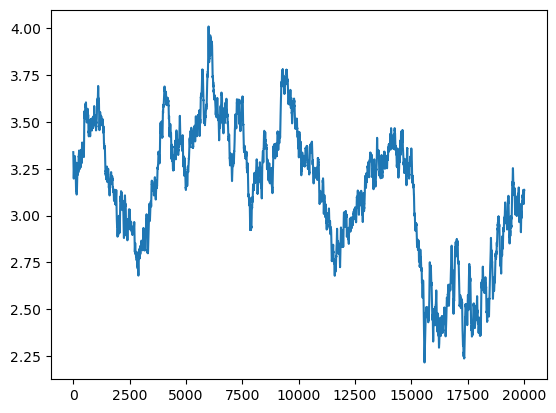

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbc3c725c70>

In [29]:
PyPlot.plot(p_traces["const_mean"])


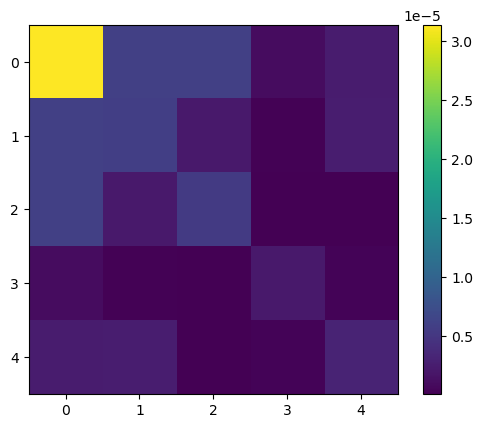

PyObject <matplotlib.colorbar.Colorbar object at 0x7fbc3ce500d0>

In [30]:
PyPlot.imshow(abs.(temp_model.params.inducing_L * temp_model.params.inducing_L'))
PyPlot.colorbar()

In [28]:
n = 50000
X = 4 .* rand(2*n) .- 1.
X = reshape(X,(n,2))
# y = sin.(2. * x[:,2]) .* sin.(6. * x[:,1]) .* exp.( -abs.(x[:,1] .- 1)) + 0.1 .* randn(n,1);
Y = sin.(1. * X[:,2]) .* sin.(2. * X[:,1]) .* exp.( -abs.(X[:,1] .- 1)) + 0.1 .* randn(n);

ni = 30


30

In [29]:
temp_model_2D = HSVGP.SVGP_obj(X, Y, ni);

In [30]:
opt_trace2D, p_traces = HSVGP.fit_svgp!(temp_model_2D, n_iters=4000, batch_size=100, return_param_traces = true);

In [31]:
logdet(Hermitian( temp_model_2D.params.inducing_L * temp_model_2D.params.inducing_L'))

-345.6463001102208

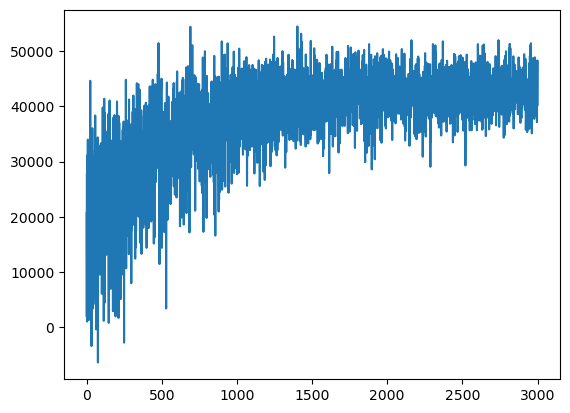

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17df97e50>

In [32]:
PyPlot.plot(opt_trace2D[1000:end])

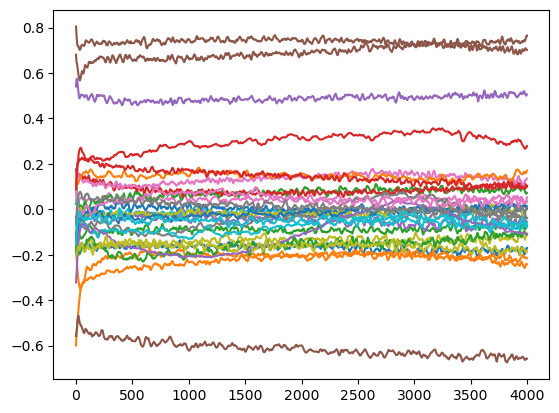

30-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1775c9580>
 PyObject <matplotlib.lines.Line2D object at 0x1775c9670>
 PyObject <matplotlib.lines.Line2D object at 0x1775c9730>
 PyObject <matplotlib.lines.Line2D object at 0x1775c97f0>
 PyObject <matplotlib.lines.Line2D object at 0x1775c98b0>
 PyObject <matplotlib.lines.Line2D object at 0x1775c9970>
 PyObject <matplotlib.lines.Line2D object at 0x1775c9a30>
 PyObject <matplotlib.lines.Line2D object at 0x1775c9b20>
 PyObject <matplotlib.lines.Line2D object at 0x1775c9be0>
 PyObject <matplotlib.lines.Line2D object at 0x1775c9ca0>
 PyObject <matplotlib.lines.Line2D object at 0x1848617c0>
 PyObject <matplotlib.lines.Line2D object at 0x1775c9df0>
 PyObject <matplotlib.lines.Line2D object at 0x1775c9eb0>
 ⋮
 PyObject <matplotlib.lines.Line2D object at 0x1775d1370>
 PyObject <matplotlib.lines.Line2D object at 0x1775d1430>
 PyObject <matplotlib.lines.Line2D object at 0x1775d14f0>
 PyObject <matplotlib.lines.Line

In [33]:
PyPlot.plot(p_traces["inducing_mean"])


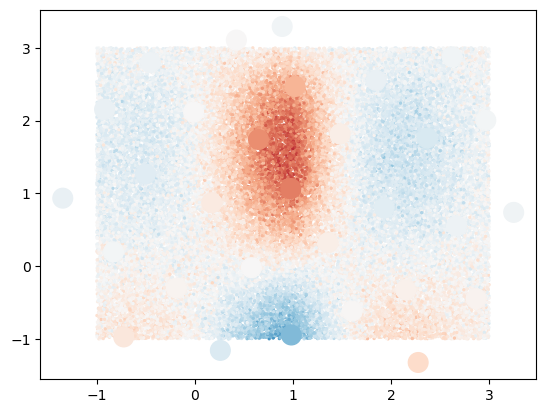

PyObject <matplotlib.collections.PathCollection object at 0x17a370fa0>

In [34]:
scatter(X[:,1],X[:,2],s=2,c=Y[:,1],vmin=-1.5,vmax=1.5,cmap=ColorMap("RdBu_r"))
scatter(temp_model_2D.params.inducing_locs[:,1],temp_model_2D.params.inducing_locs[:,2], c = temp_model_2D.params.inducing_mean, s=200,vmin=-1.5,vmax=1.5,cmap=ColorMap("RdBu_r"))

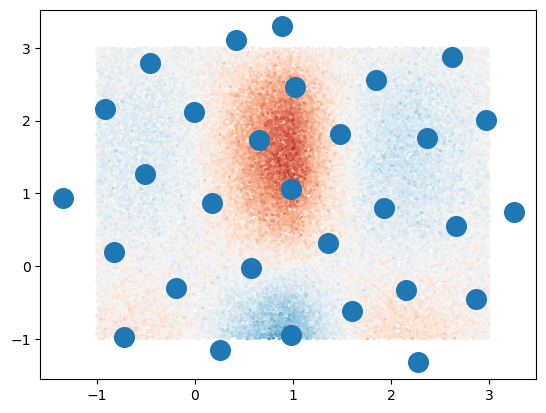

PyObject <matplotlib.collections.PathCollection object at 0x17a3ccbb0>

In [35]:
scatter(X[:,1],X[:,2],s=2,c=Y[:,1],vmin=-1.5,vmax=1.5,cmap=ColorMap("RdBu_r"))
scatter(temp_model_2D.params.inducing_locs[:,1],temp_model_2D.params.inducing_locs[:,2], s=200,vmin=-1.5,vmax=1.5,cmap=ColorMap("RdBu_r"))

In [36]:
px = hcat([[x,y] for x in collect(-1:0.05:3) for y in collect(-1:0.05:3)]...)'
pn = size(px)[1]

6561

In [37]:
p_mean, p_sd = HSVGP.pred_vgp(px, temp_model_2D);

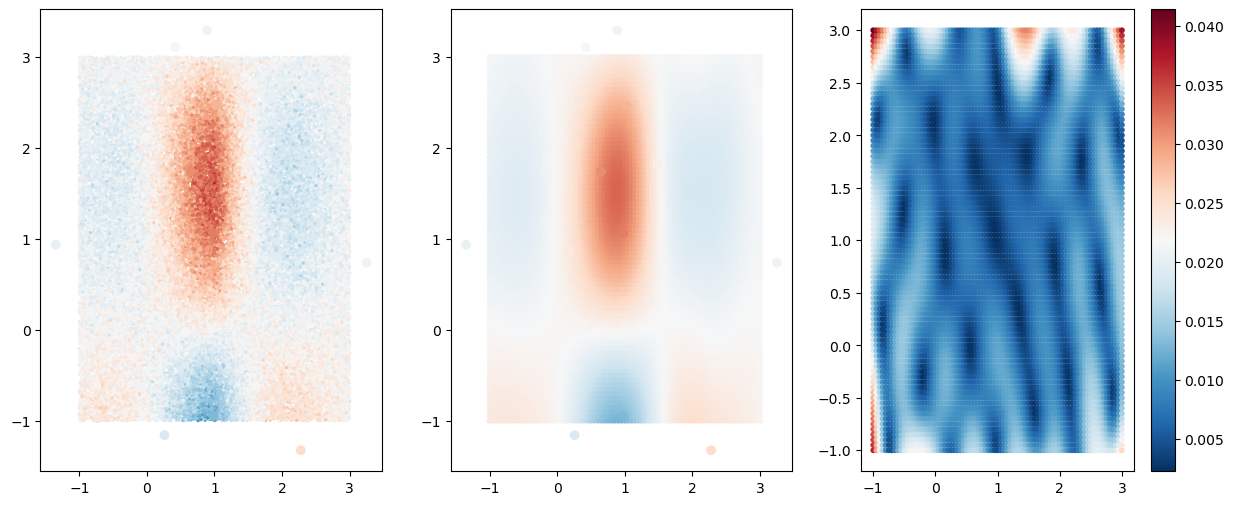

PyObject <matplotlib.colorbar.Colorbar object at 0x17a172730>

In [38]:
fig = figure(figsize=(15,6))
subplot(131)
PyPlot.scatter(X[:,1],X[:,2],s=2,c=Y[:,1],vmin=-1.5,vmax=1.5,cmap=ColorMap("RdBu_r"))
PyPlot.scatter(temp_model_2D.params.inducing_locs[:,1],
    temp_model_2D.params.inducing_locs[:,2], 
    c=temp_model_2D.params.inducing_mean,
    vmin=-1.5,
    vmax=1.5,
    cmap=ColorMap("RdBu_r"))
subplot(132)
PyPlot.scatter(px[:,1],px[:,2],s=10,c=p_mean,vmin=-1.5,vmax=1.5,cmap=ColorMap("RdBu_r"))
scatter(temp_model_2D.params.inducing_locs[:,1],
    temp_model_2D.params.inducing_locs[:,2], 
    c=temp_model_2D.params.inducing_mean,
    vmin=-1.5,
    vmax=1.5,
    cmap=ColorMap("RdBu_r"))
subplot(133)
PyPlot.scatter(px[:,1],px[:,2],s=10,c=p_sd,cmap=ColorMap("RdBu_r"))
PyPlot.colorbar()


In [121]:
test_cov = HSVGP.covfn(temp_model_2D.params.inducing_locs,temp_model_2D.params.inducing_locs,temp_model_2D.params);
test_mat = ones(50,30);

In [133]:
@time begin
    for ii in 1:100000
        tmptmp = test_mat * inv(test_cov)
        tmptmp * test_vec
    end
end

  7.200328 seconds (600.00 k allocations: 3.341 GiB, 7.62% gc time)


In [134]:
@time begin
    for ii in 1:100000
        tmptmp = (test_cov \  test_mat')'
        tmptmp * test_vec
    end
end

  6.956123 seconds (600.00 k allocations: 1.898 GiB, 5.02% gc time)


In [135]:
@time begin
    for ii in 1:100000
        tmptmp = test_mat / test_cov
        tmptmp * test_vec
    end
end

  7.410396 seconds (500.00 k allocations: 3.028 GiB, 6.81% gc time)


In [1]:
N = 100
n = 10

10